In [1]:
import pandas as pd
import pickle
import datetime

In [2]:
import sys
sys.path.insert(0, './utils/')

import ml_pipeline as mp

In [3]:
import importlib
importlib.reload(mp)

<module 'ml_pipeline' from 'E:\\github\\lending_club\\lending_club_loans_default_prediction\\./utils\\ml_pipeline.py'>

In [4]:
data_path = './data/loan.csv'

df = pd.read_csv(data_path)

C:\Users\xzhou\AppData\Local\Temp\ipykernel_24500\1420088683.py:3: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [5]:
df.shape

(887379, 74)

In [6]:
# Assign labels based on loan status

excluded = {'Issued', 'Does not meet the credit policy. Status:Charged Off',
            'Does not meet the credit policy. Status:Fully Paid'}
positive = {'Current', 'Fully Paid'}
negative = {'Charged Off', 'Default', 'In Grace Period', 
       'Late (16-30 days)', 'Late (31-120 days)'}

def assign_label(status):
    """
    Classify loan staus based on description
    """
    try: 
        status=status.strip()
        if status in positive:
            return "positive"
        elif status in negative:
            return "negative"
        else: 
            return "excluded"
    except: 
        return "excluded"

In [7]:
df['label'] = df['loan_status'].apply(lambda x: assign_label(x))

In [8]:
# Drop ids, and loan status to prevent info leakage
cols_to_drop = ['id', 'member_id', 'loan_status']
df_id_removal = df.drop(columns = cols_to_drop)

In [9]:
# Only keep loans with good or bad status
df_label = df_id_removal[df_id_removal['label']!='excluded']
df_label.label.unique()

array(['positive', 'negative'], dtype=object)

In [10]:
model = mp.MLPipeline(df_label)

In [11]:
df_processed = model.preprocess_data()

INFO:root:Label encoding: {'positive': 0, 'negative': 1}
INFO:root:Dropped columns with missing values above the threshold
INFO:root:Processed date columns
INFO:root:Handled missing values for numerical columns
INFO:root:Handled extreme values for numerical columns
INFO:root:Created dummy variables for categorical columns
INFO:root:Handled high correlation among numerical columns
INFO:root:Standardized numerical columns
INFO:root:Cleaned feature names for XGBoost


In [12]:
top_features = model.select_features(n_samples=1000)

INFO:root:Starting feature selection...
INFO:root:Feature selection completed in 5.14 seconds


In [13]:
top_features 

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim',
 'purpose_medical',
 'purpose_vacation',
 'pymnt_plan_y',
 'pymnt_plan_nan',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B4',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_F5',
 'sub_grade_G2',
 'sub_grade_G4',
 'initial_list_status_w',
 'home_ownership_MORTGAGE',
 'home_ownership_nan',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_leng

C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression: Done (Execution Time: 0.02 seconds)
KNN: Done (Execution Time: 0.00 seconds)
SVM: Done (Execution Time: 0.49 seconds)
Random Forest: Done (Execution Time: 0.45 seconds)
XGBoost: Done (Execution Time: 0.20 seconds)


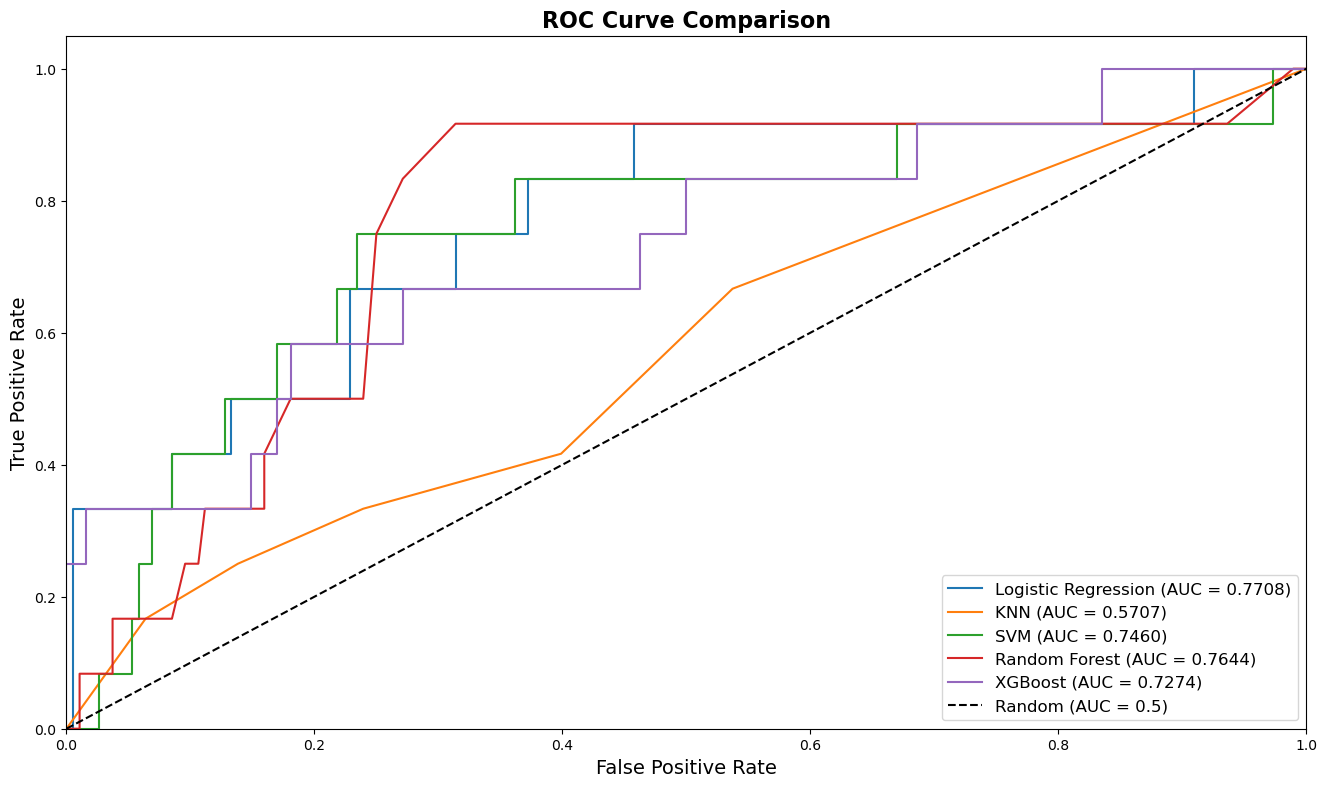

Model Performance Metrics:

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression     0.890   0.222222  0.333333  0.266667  0.770833
1                  KNN     0.735   0.081633  0.333333  0.131148  0.570700
2                  SVM     0.900   0.166667  0.166667  0.166667  0.746011
3        Random Forest     0.920   0.166667  0.083333  0.111111  0.764406
4              XGBoost     0.945   0.571429  0.333333  0.421053  0.727394

Best Performing Model:

Model        Logistic Regression
Accuracy                    0.89
Precision               0.222222
Recall                  0.333333
F1 Score                0.266667
ROC AUC                 0.770833
Name: 0, dtype: object

Best Performing Model:

Model        Logistic Regression
Accuracy                    0.89
Precision               0.222222
Recall                  0.333333
F1 Score                0.266667
ROC AUC                 0.770833
Name: 0, dtype: object

Saved best model (Logistic Regressi

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
model.run_classification_models(n_samples=1000)

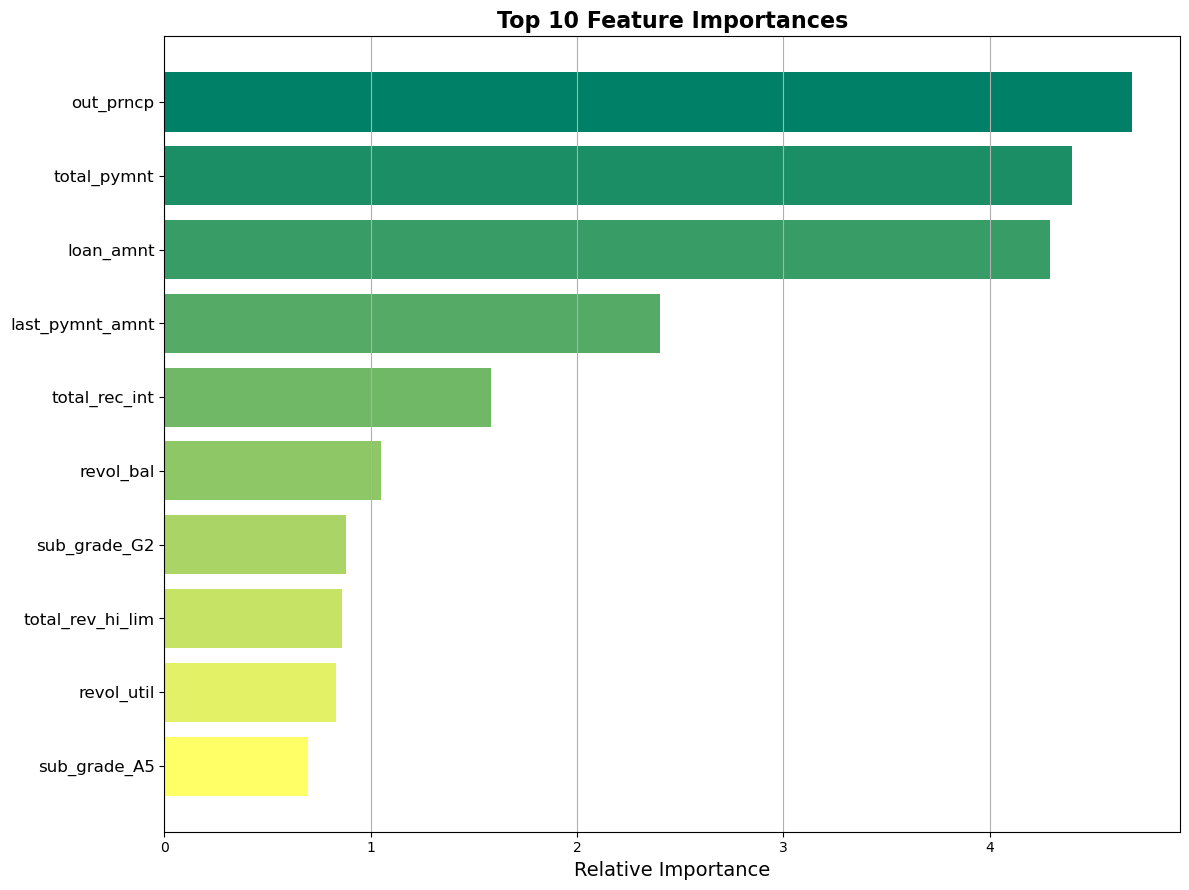

In [15]:
model.plot_top_n_features()